In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crimes-in-boston/crime.csv
/kaggle/input/crimes-in-boston/offense_codes.csv


In [2]:
import pandas as pd
boston= pd.read_csv('../input/crimes-in-boston/crime.csv',encoding='ISO-8859-1',engine='python')
boston.columns = map(str.lower, boston.columns)

In [3]:
boston.drop_duplicates(['incident_number'],inplace=True)

In [4]:
new=boston[['lat','long']]
new.describe()

,lat,long
count,265313.000000,265313.000000
mean,42.212491,-70.905304
std,2.179400,3.525385
min,-1.000000,-71.178674
25%,42.297163,-71.097951
50%,42.325653,-71.077720
75%,42.348624,-71.062149
max,42.395042,-1.000000


The latitude of Boston, MA, USA is 42.361145, and the longitude is -71.057083.
The numbers outside the boundries of Boston can be omitted.

In [5]:
boston[boston.lat>= 40]
boston[boston.long<=-70]
boston.shooting.unique()# Output: ([nan, 'Y'])
boston['shooting'] = boston.shooting.map({'NaN':0, 'Y':1}) #I change missing values is 0 because if we dont know whether there is a shooting in the area or not, probably there is no shooting incident in a area.
boston.shooting=pd.get_dummies(boston.shooting)
boston.shooting.value_counts()

0    281891
1       626
Name: shooting, dtype: int64

In [6]:
total = boston.isnull().sum().sort_values(ascending=False)
percent = (boston.isnull().sum()/boston.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data# I can't impute missignees in lat, long street,distinct and ucr_part varibles. If ı drop them, my dataset wont be reduced too much.

,Total,Percent
lat,17204,0.060895
long,17204,0.060895
street,9268,0.032805
district,1583,0.005603
ucr_part,54,0.000191
location,0,0.000000
reporting_area,0,0.000000
offense_code,0,0.000000
offense_code_group,0,0.000000
offense_description,0,0.000000


In [7]:
boston=boston.dropna()
boston.info()# number of non-null is the same for all variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263187 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_number      263187 non-null  object 
 1   offense_code         263187 non-null  int64  
 2   offense_code_group   263187 non-null  object 
 3   offense_description  263187 non-null  object 
 4   district             263187 non-null  object 
 5   reporting_area       263187 non-null  object 
 6   shooting             263187 non-null  uint8  
 7   occurred_on_date     263187 non-null  object 
 8   year                 263187 non-null  int64  
 9   month                263187 non-null  int64  
 10  day_of_week          263187 non-null  object 
 11  hour                 263187 non-null  int64  
 12  ucr_part             263187 non-null  object 
 13  street               263187 non-null  object 
 14  lat                  263187 non-null  float64
 15  long             

In [8]:
import pandas as pd
boston['date']=pd.to_datetime(boston['occurred_on_date']).dt.floor('d')

In [9]:
boston.date = pd.to_datetime(boston.date, format='%Y-%m-%d')

In [10]:
boston['date'].describe().to_frame()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date
count,263187
unique,1177
top,2016-01-01 00:00:00
freq,307
first,2015-06-15 00:00:00
last,2018-09-03 00:00:00


In [11]:
yearpercentages=boston.groupby(['year'])['year'].count()/boston.year.count()*100

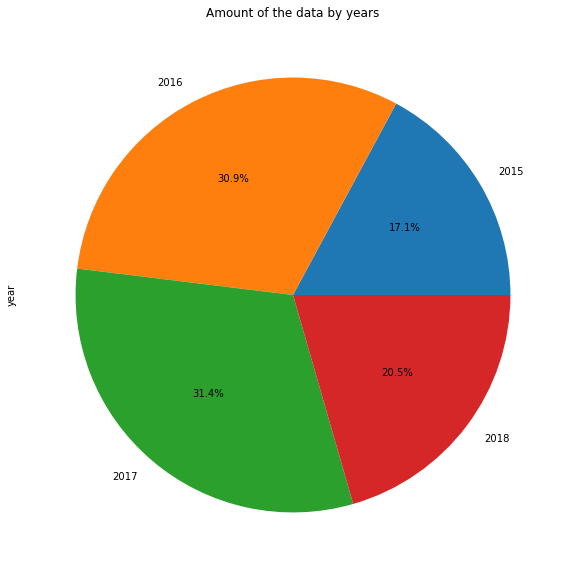

In [12]:
yearpercentages.plot.pie(autopct="%.1f%%",title="Amount of the data by years",figsize=(20,10))

Data set started from June of 2015 and finished on september of 2018. It does not cover all months of the year for 2015 and 2018. There is less value comes from 2015 and 2018. Thus, to get a reliable result, we should consider this situation.

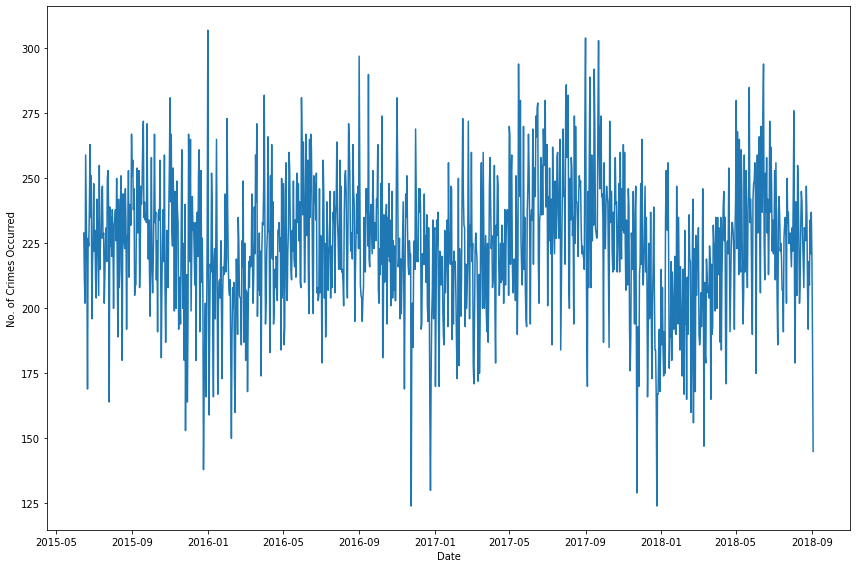

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = boston.groupby(['date'])["incident_number"].count().reset_index()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p=sns.lineplot(x=df.iloc[:,0], y=df.iloc[:,1], data=df)
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Date")
plt.tight_layout()
plt.show()

There is no increasing trend for incident_numbers by years, but it looks there is a seasonality. In summer time, incident numbers are increase and it decrease in winter.

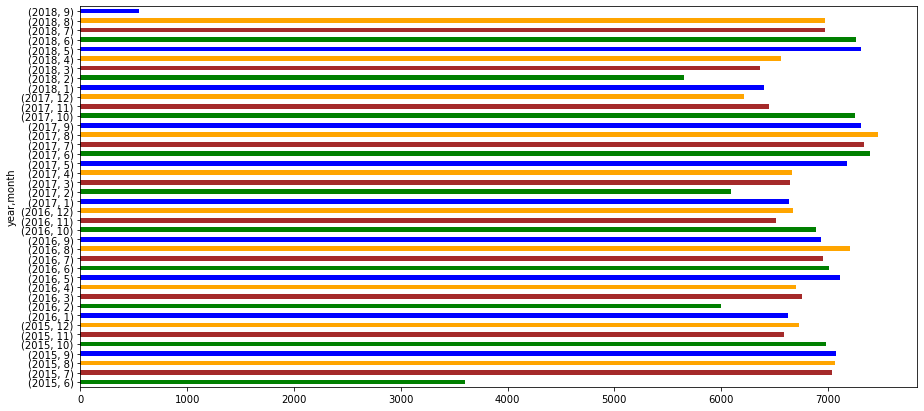

In [14]:
plt.figure(figsize=(15,7))
boston.groupby(['year','month']).count()['incident_number'].plot.barh(color = ['green', 'brown', 'orange', 'blue'])

This graph is also says that incident numbers increase in summer.

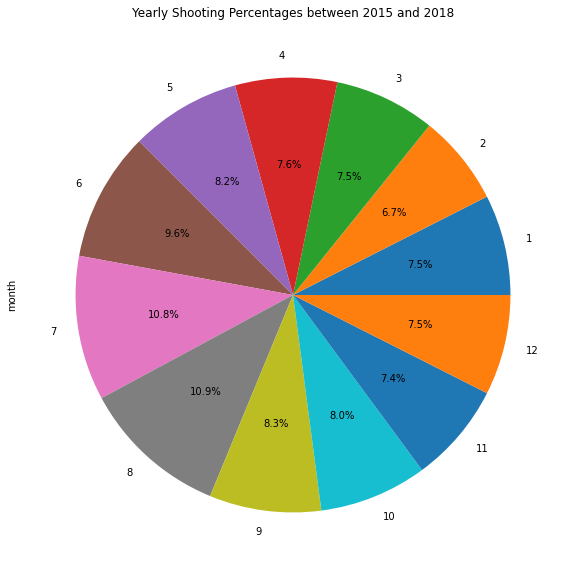

In [15]:
shooting_monthly=boston.groupby(['month'])['month'].count()/len(boston['incident_number'])*100
shooting_monthly.plot.pie(autopct="%.1f%%",title="Yearly Shooting Percentages between 2015 and 2018",figsize=(20,10))

Percentages of shooting in june, july is higher.

In [16]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
boston['day_of_week'] =boston['day_of_week'].astype(cat_type)
crime_2015=boston[boston['year']==2015]
crime_2016=boston[boston['year']==2016]
crime_2017=boston[boston['year']==2017]
crime_2018=boston[boston['year']==2018]

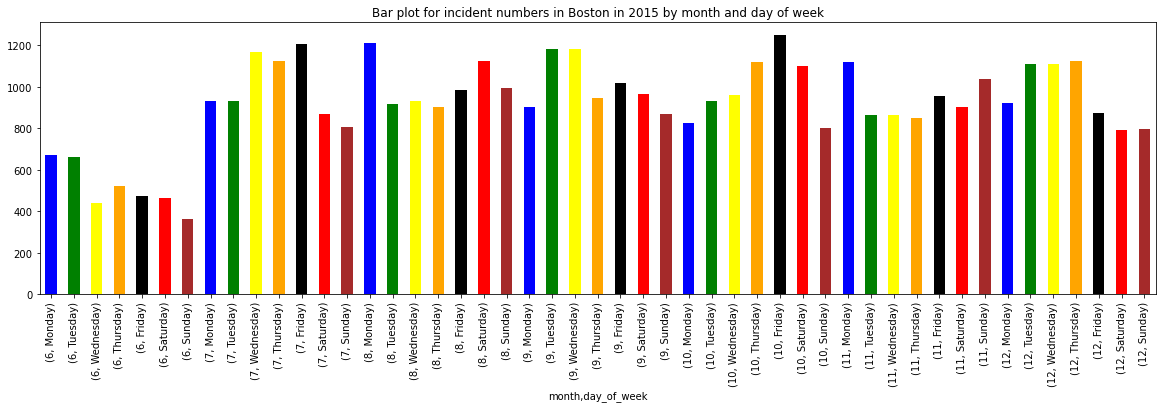

In [17]:
plt.figure(figsize=(20,5))
plt.title("Bar plot for incident numbers in Boston in 2015 by month and day of week")
crime_2015.groupby(['month','day_of_week']).count()['incident_number'].plot.bar(color = ['blue', 'green', 'yellow', 'orange','black','red','brown'])

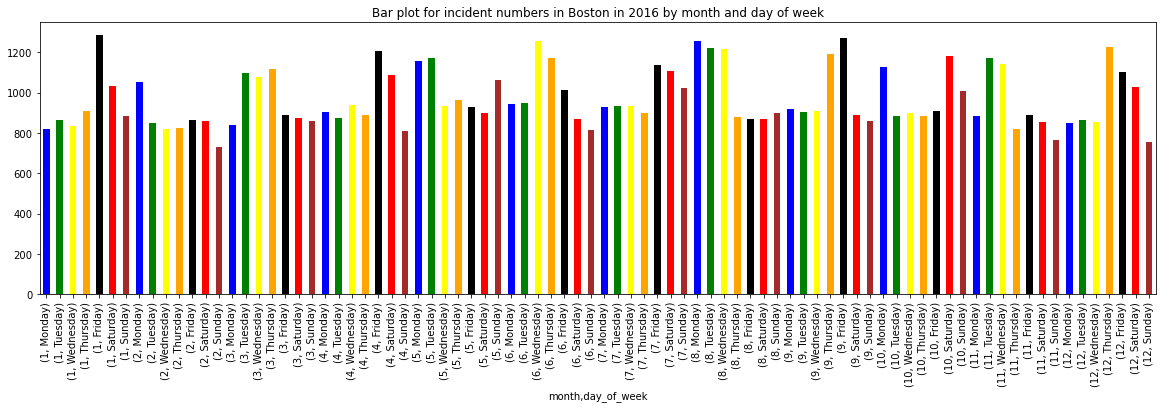

In [18]:
plt.figure(figsize=(20,5))
plt.title("Bar plot for incident numbers in Boston in 2016 by month and day of week")
crime_2016.groupby(['month','day_of_week']).count()['incident_number'].plot.bar(color = ['blue', 'green', 'yellow', 'orange','black','red','brown'])

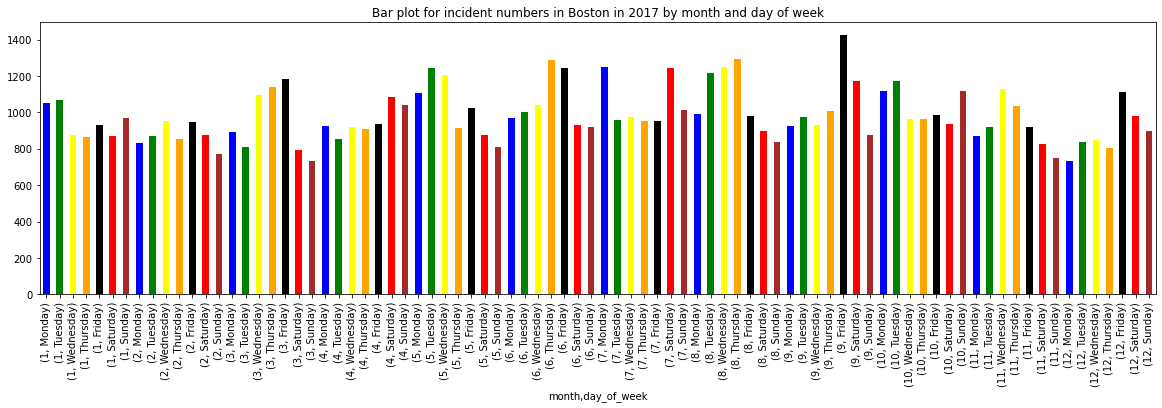

In [19]:
plt.figure(figsize=(20,5))
plt.title("Bar plot for incident numbers in Boston in 2017 by month and day of week")
crime_2017.groupby(['month','day_of_week']).count()['incident_number'].plot.bar(color = ['blue', 'green', 'yellow', 'orange','black','red','brown'])

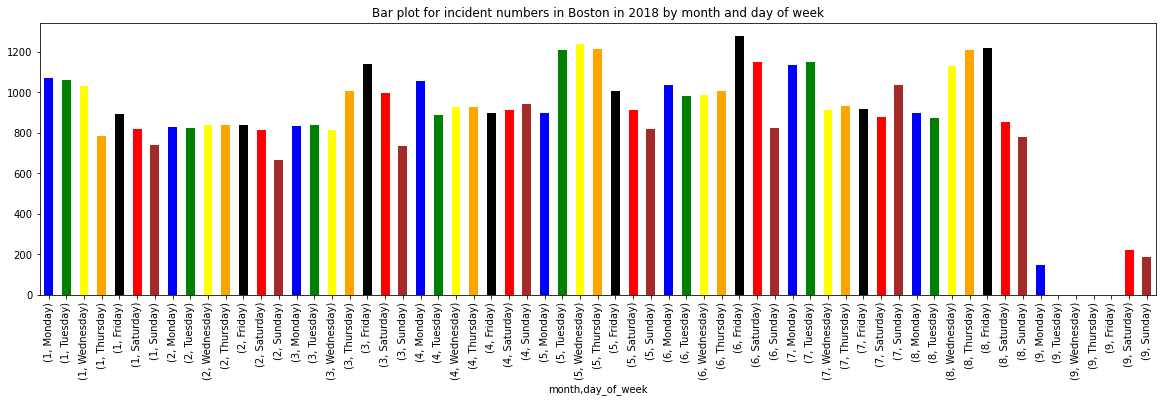

In [20]:
plt.figure(figsize=(20,5))
plt.title("Bar plot for incident numbers in Boston in 2018 by month and day of week")
crime_2018.groupby(['month','day_of_week']).count()['incident_number'].plot.bar(color = ['blue', 'green', 'yellow', 'orange','black','red','brown'])

Incident numbers decrease after Friday till Sunday in general.

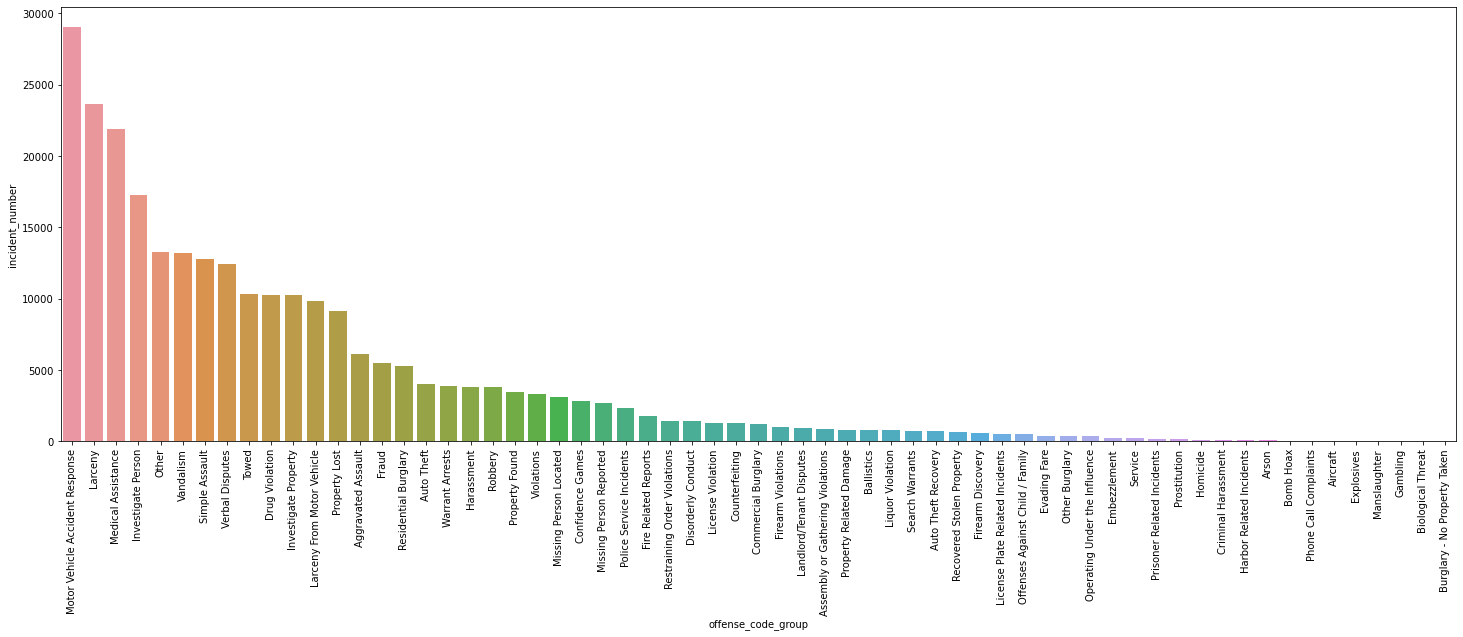

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
offenses = boston.groupby('offense_code_group')['incident_number'].count().sort_values(ascending = False).to_frame()
offenses.reset_index(inplace = True)
plt.figure(figsize=(25,8))
ax = sns.barplot(x="offense_code_group", y="incident_number", data=offenses)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Motor vechile accident is the most likely crimes in Boston. The second most likely crime is larcency.

In [22]:
offenses1 = crime_2015.groupby('offense_code_group')['incident_number'].count().sort_values(ascending = False).to_frame()
offenses1.reset_index(inplace = True)
offenses2 = crime_2016.groupby('offense_code_group')['incident_number'].count().sort_values(ascending = False).to_frame()
offenses2.reset_index(inplace = True)
offenses3 = crime_2017.groupby('offense_code_group')['incident_number'].count().sort_values(ascending = False).to_frame()
offenses3.reset_index(inplace = True)
offenses4 = crime_2018.groupby('offense_code_group')['incident_number'].count().sort_values(ascending = False).to_frame()
offenses4.reset_index(inplace = True)
o2015 = offenses1.rename(columns = {'offense_code_group': 'offense_code_group2015'}, inplace = False)
o2016=offenses2.rename(columns = {'offense_code_group': 'offense_code_group2016'}, inplace = False)
o2017=offenses3.rename(columns = {'offense_code_group': 'offense_code_group2017'}, inplace = False)
o2018=offenses4.rename(columns = {'offense_code_group': 'offense_code_group2018'}, inplace = False)
df_col = pd.concat([o2015,o2016,o2017,o2018], axis=1).drop('incident_number',axis=1)
df_col.head(5)

,offense_code_group2015,offense_code_group2016,offense_code_group2017,offense_code_group2018
0,Motor Vehicle Accident Response,Motor Vehicle Accident Response,Motor Vehicle Accident Response,Motor Vehicle Accident Response
1,Larceny,Larceny,Medical Assistance,Medical Assistance
2,Medical Assistance,Medical Assistance,Larceny,Larceny
3,Other,Investigate Person,Investigate Person,Investigate Person
4,Vandalism,Vandalism,Verbal Disputes,Simple Assault


I want to see names of top 5 crimes by years. Motor vechile accident response is the most likely crime since 2015. Larcency is the second common crime in 2015 and 2016, but it gives its place to medical assistance crimes in recent year. The forth crime is investigate person since 2016.

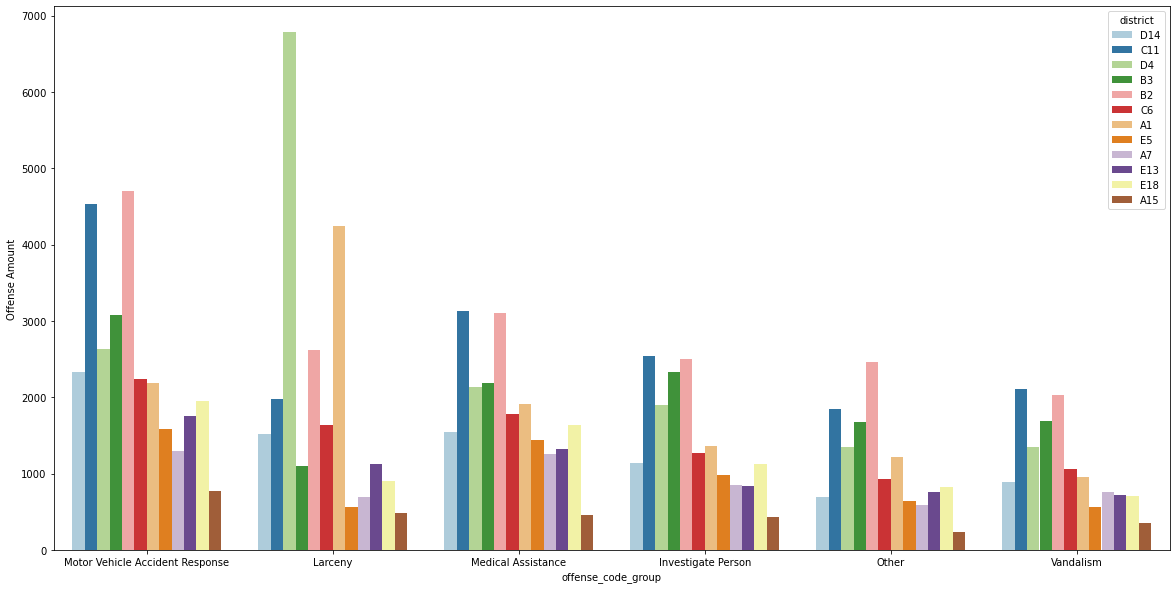

In [23]:
fig = plt.figure(figsize=(20,10))
order2 = boston['offense_code_group'].value_counts().sort_values(ascending=False).head(6).index
sns.countplot(data =boston, x='offense_code_group',hue='district', order = order2,palette='Paired' );
plt.ylabel("Offense Amount");

Text(0.5, 1.0, 'Incident numbers in 2018 by distinct')

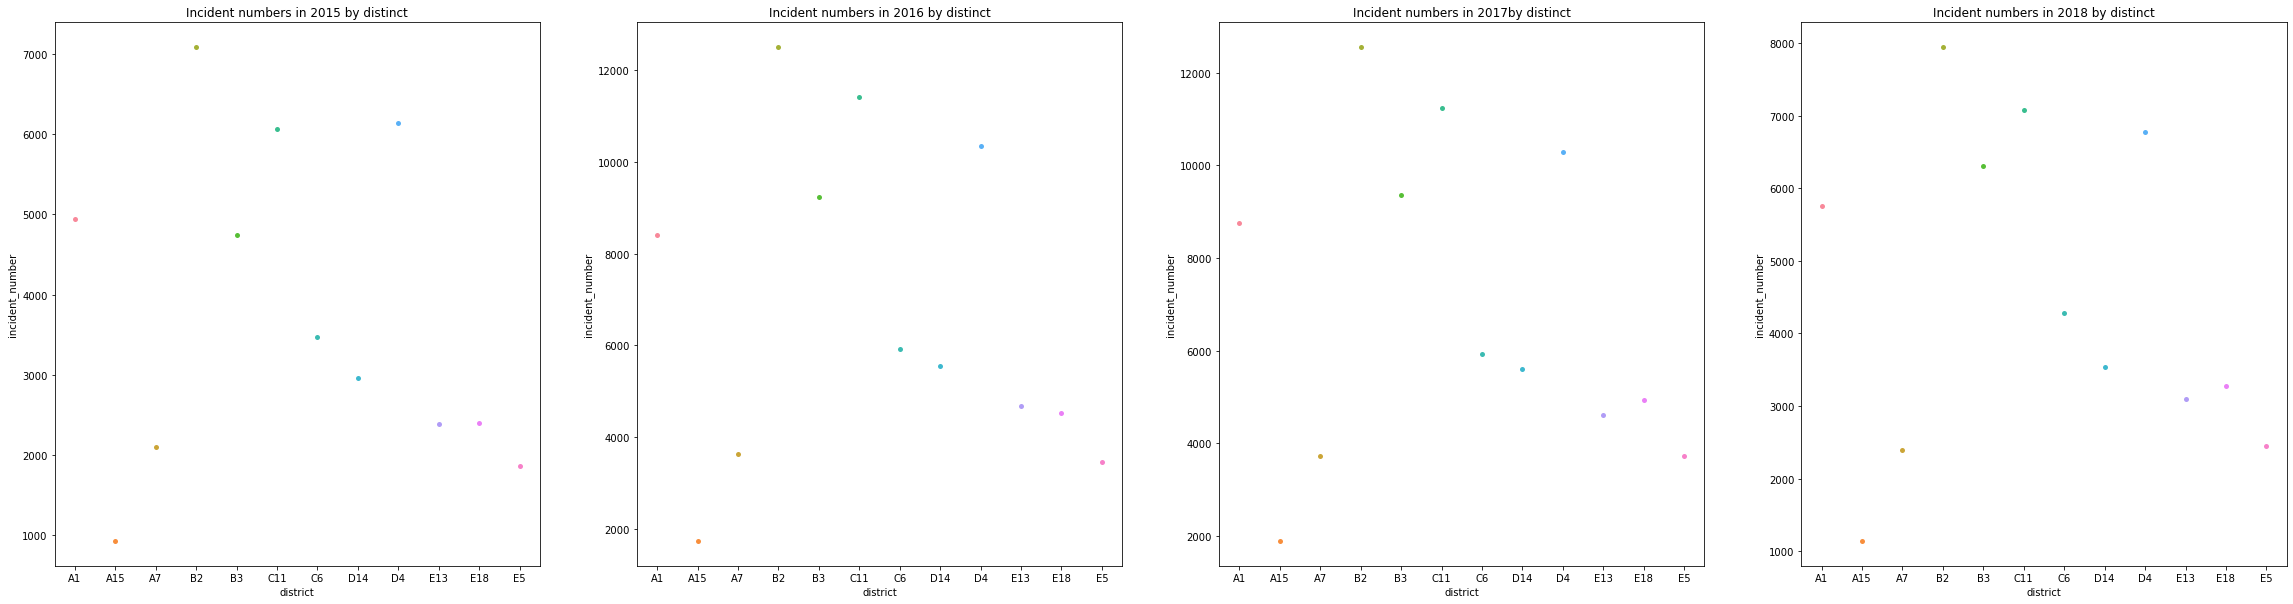

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,4, figsize = (40,10))
df2015 = crime_2015.groupby(["district"])["incident_number"].count().reset_index()
df2015
sns.set(style="whitegrid")
sns.swarmplot(x='district',y='incident_number',data=df2015,ax=axes[0]).set_title('Incident numbers in 2015 by distinct')

df2016 = crime_2016.groupby(["district"])["incident_number"].count().reset_index()
df2016
sns.set(style="whitegrid")
sns.swarmplot(x='district',y='incident_number',data=df2016,ax=axes[1]).set_title('Incident numbers in 2016 by distinct')

df2017 = crime_2017.groupby(["district"])["incident_number"].count().reset_index()
df2017
sns.set(style="whitegrid")
sns.swarmplot(x='district',y='incident_number',data=df2017,ax=axes[2]).set_title('Incident numbers in 2017by distinct')

df2018 = crime_2018.groupby(["district"])["incident_number"].count().reset_index()
df2018
sns.set(style="whitegrid")
sns.swarmplot(x='district',y='incident_number',data=df2018,ax=axes[3]).set_title('Incident numbers in 2018 by distinct')


B2 and C11 has highest rate of motor vechile accidents. D4 and A1 is has highest rate of Larcency. A15 has lowest rates for all of the crimes in the graph.

The total number of crimes is highest in distinct B2 and lowest in A15 from 2015 to 2018. Moreover, graphs show same pattern for each year.

Text(0.5, 1.0, 'Shooting numbers in 2018 by distinct')

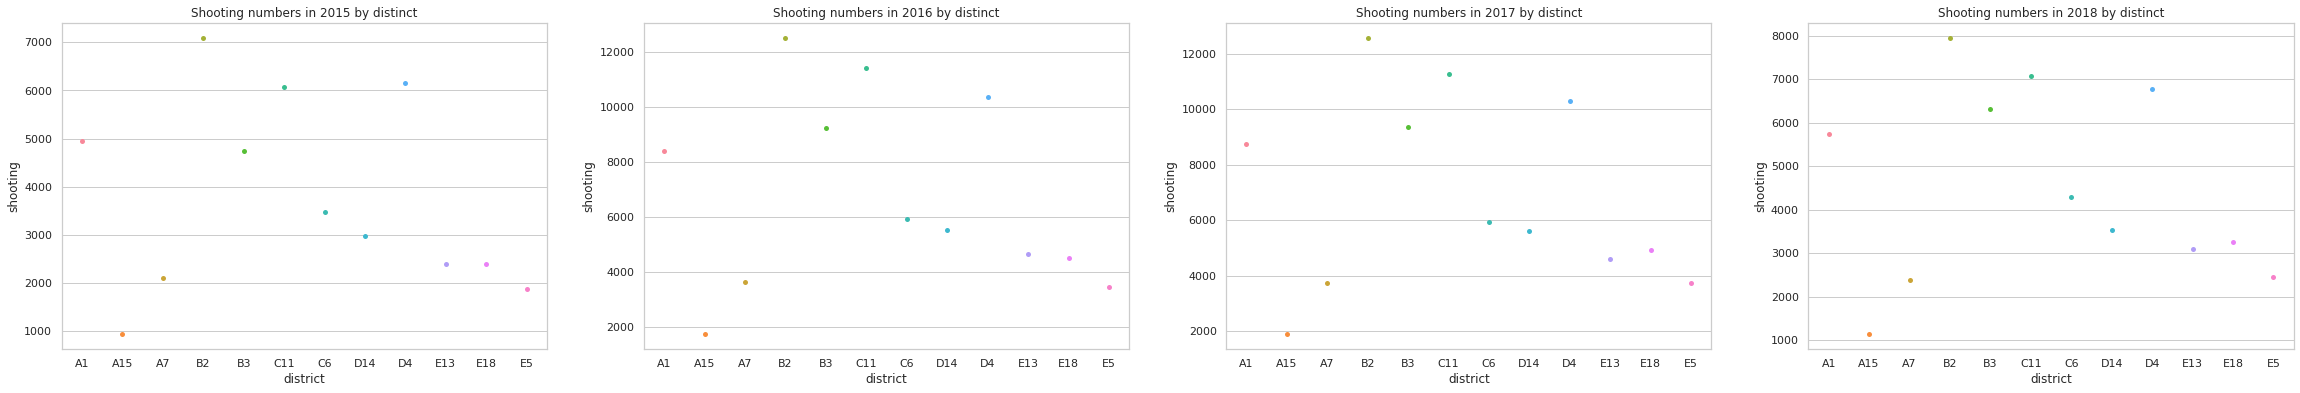

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,4, figsize = (40,6))
df2015 = crime_2015.groupby(["district"])["shooting"].count().reset_index()
df2015
sns.set(style="whitegrid")
sns.swarmplot(x='district',y='shooting',data=df2015,ax=axes[0]).set_title('Shooting numbers in 2015 by distinct')

df2016 = crime_2016.groupby(["district"])['shooting'].count().reset_index()
df2016
sns.set(style="whitegrid")
sns.swarmplot(x='district',y='shooting',data=df2016,ax=axes[1]).set_title('Shooting numbers in 2016 by distinct')

df2017 = crime_2017.groupby(["district"])["shooting"].count().reset_index()
df2017
sns.set(style="whitegrid")
sns.swarmplot(x='district',y='shooting',data=df2017,ax=axes[2]).set_title('Shooting numbers in 2017 by distinct')

df2018 = crime_2018.groupby(["district"])["shooting"].count().reset_index()
df2018
sns.set(style="whitegrid")
sns.swarmplot(x='district',y='shooting',data=df2018,ax=axes[3]).set_title('Shooting numbers in 2018 by distinct')

Again, the same patterns for shooting by years.

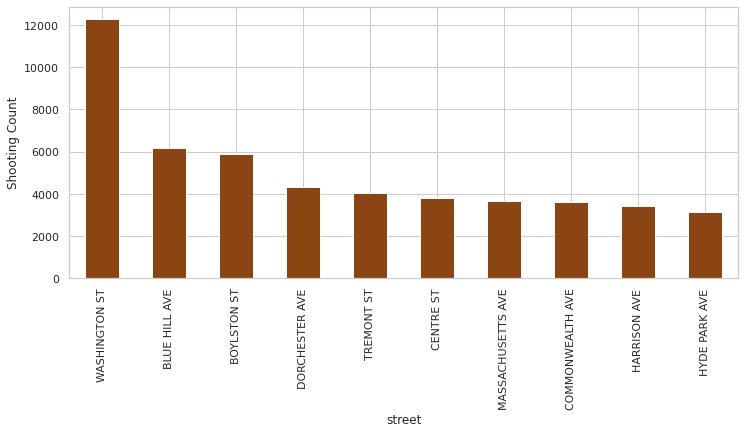

In [26]:
fig = plt.figure(figsize=(12,5))
crime_street = boston.groupby('street')['shooting'].count().nlargest(10)
crime_street.plot(kind='bar', color ="saddlebrown")
plt.xlabel("street")
plt.ylabel("Shooting Count")
plt.show()

The graph reveal the shooting counts for some streets. Washington street has highest rates of shooting.

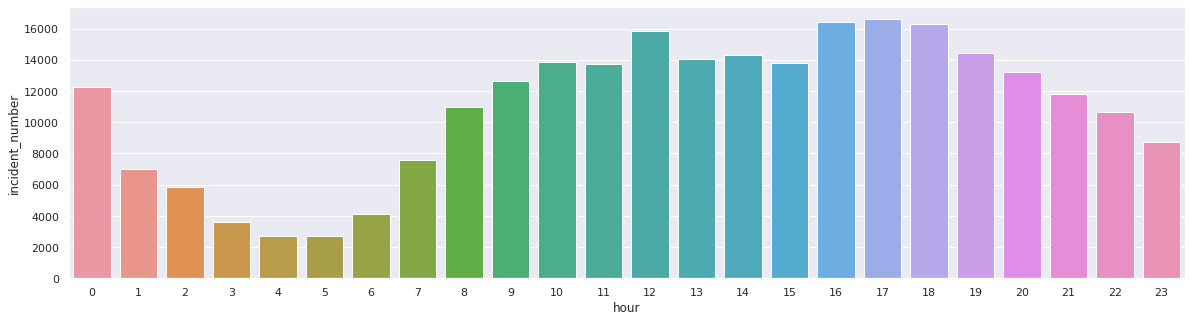

In [27]:
hour_nums = boston.groupby(['hour']).count()['incident_number'].to_frame().reset_index()
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(x = 'hour' , y="incident_number", data = hour_nums)

Rates of crimes is lower early in the morning, and higher incident numbers are at 12 a.m. , 16-18 p.m. Probably, Number of people in any street increases at these hours.

In [28]:
boston_map=boston.groupby(['lat','long'])['incident_number'].count().reset_index()
import plotly.express as px
fig = px.density_mapbox(boston_map, lat='lat', lon='long', z='incident_number', radius=6,center=dict(lat=42, lon=-71), zoom=7, mapbox_style="stamen-terrain")
fig.show()